# Unit 5 - Financial Planning

In [50]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [51]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [52]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [53]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [60]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $42174.90
The current value of your 5.3 ETH is $12569.63


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [61]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [62]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [63]:
# Format current date as ISO format
today = pd.Timestamp('2020-05-01', tz='America/New_York').isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_investments = alpaca.get_bars(
    tickers,
    timeframe,
    start = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_investments[df_investments['symbol']=='AGG'].drop('symbol', axis = 1)
SPY = df_investments[df_investments['symbol']=='SPY'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
df_investments = pd.concat([AGG,SPY], axis=1, keys=['AGG','SPY'])
# Preview DataFrame
df_investments

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099551   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97  3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88  4611519   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41  6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77  3786651   
...                           ...       ...       ...     ...      ...   
2023-06-05 04:00:00+00:00   97.85   98.3200   97.7600   98.08  7562729   
2023-06-06 04:00:00+00:00   98.12   98.2100   97.8900   98.20  3815981   
2023-06-07 04:00:00+00:00   98.15   98.2200   97.5900   97.68  5131587   
2023-06-08 04:00:00+00:00   97.80   98.2100   97.7700   98.20  5041870   
2023-06-09 04:00:00+00:00   97.91   98.0500   97.7900   97.97  7052968   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-05-01 04:00:00+00:00       24394  116.846121  285.31  290.6572  281.5200   
2020-05-04 04:00:00+00:00       15545  116.960599  280.73  283.9000  279.1300   
2020-05-05 04:00:00+00:00       15146  116.879640  286.64  289.2500  283.7134   
2020-05-06 04:00:00+00:00       20233  116.426742  288.05  288.4600  283.7800   
2020-05-07 04:00:00+00:00       15963  116.641826  287.75  289.7800  287.1300   
...                               ...         ...     ...       ...       ...   
2023-06-05 04:00:00+00:00       28533   98.118648  428.28  429.6700  426.3700   
2023-06-06 04:00:00+00:00       18334   98.110790  426.67  428.5772  425.9900   
2023-06-07 04:00:00+00:00       24863   97.808394  428.44  429.6200  426.1100   
2023-06-08 04:00:00+00:00       20171   98.110169  426.62  429.6000  425.8200   
2023-06-09 04:00:00+00:00       22613   97.979621  429.96  431.9900  428.8700   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00  282.83  125180028      639987  284.092832  
2020-05-04 04:00:00+00:00  283.59   80882213      460681  281.765334  
2020-05-05 04:00:00+00:00  286.15   79569939      459764  287.400201  
2020-05-06 04:00:00+00:00  284.34   73632628      436219  286.096273  
2020-05-07 04:00:00+00:00  287.70   75250412      422688  287.989956  
...                           ...        ...         ...         ...  
2023-06-05 04:00:00+00:00  427.10   70238989      552298  427.989239  
2023-06-06 04:00:00+00:00  428.03   64029345      491551  427.585975  
2023-06-07 04:00:00+00:00  426.55   85387805      582960  427.338948  
2023-06-08 04:00:00+00:00  429.13   61952842      473941  428.295301  
2023-06-09 04:00:00+00:00  429.90   84009754      581130  430.232433  

[783 rows x 14 columns]

In [64]:
# Pick AGG and SPY close prices
agg_close = pd.DataFrame()
spy_close = pd.DataFrame()

agg_close["AGG"] = df_investments['AGG']['close']
spy_close['SPY'] = df_investments['SPY']['close']

agg_close_price = agg_close['AGG'].iloc[-1]
spy_close_price = spy_close['SPY'].iloc[-1]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.97
Current SPY closing price: $429.9


In [65]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21495.00
The current value of your 200 AGG shares is $19594.00


### Savings Health Analysis

In [87]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
shares = my_spy_value + my_agg_value
crypto = my_eth_value + my_btc_value

# Create savings DataFrame
data = {'amount' :[crypto, shares]}
index = ['crypto', 'shares']
df_savings = pd.DataFrame(data, index=index)
# Display savings DataFrame
display(df_savings)

,amount
crypto,54744.535488
shares,41089.000000


<Axes: ylabel='amount'>

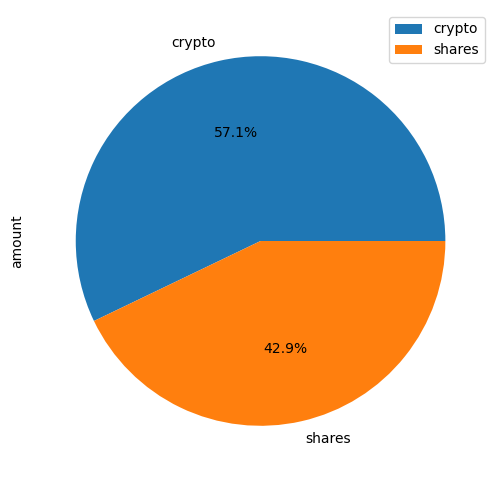

In [93]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', autopct='%.1f%%', figsize=(6, 6))


In [95]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(emergency_fund)
# Calculate total amount of savings
total_savings
# Validate saving health
# YOUR CODE HERE!

36000


NameError: name 'total_savings' is not defined

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!


# Concatenate the ticker DataFrames
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")